# MVP de Qualidade de Software, Segurança e Sistemas Inteligentes
## Objetivo  
O objetivo deste projeto é **prever se uma pessoa é introvertida ou extrovertida** com base em seu comportamento e preferências, a partir de um conjunto de dados estruturado.

Esse tipo de classificação pode ser útil em áreas como psicologia, recursos humanos, recomendação de conteúdo, entre outros, onde compreender o perfil do usuário ajuda a tomar decisões mais personalizadas.

## Imports

In [126]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Tratamento das colunas

In [127]:
from sklearn.preprocessing import StandardScaler

# Remove linhas com valores ausentes
def preparar_dados(df):
    df = df.dropna().reset_index(drop=True)

    # Codifica variáveis booleanas
    df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

    # Codifica a saída
    df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

    # Define colunas
    numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                    'Friends_circle_size', 'Post_frequency']
    boolean_cols = ['Stage_fear', 'Drained_after_socializing']
    target_col = 'Personality'

    # Normaliza as colunas numéricas
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Separa X e y
    X = df[numeric_cols + boolean_cols]
    y = df[target_col]

    return X, y, scaler

## Carga do Dataset

In [128]:
# Carga do Dataset

url = "https://raw.githubusercontent.com/Extrasza/mvp_introversion/main/personality_datasert.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Separação em conjunto de treino e conjunto de teste com holdout

In [129]:
test_size = 0.50 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X, y, scaler = preparar_dados(dataset) # Use a função preparar_dados para pré-processar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem

KNN: 0.922759 (0.012642)
CART: 0.874483 (0.015359)
NB: 0.929655 (0.015666)
SVM: 0.929655 (0.015666)


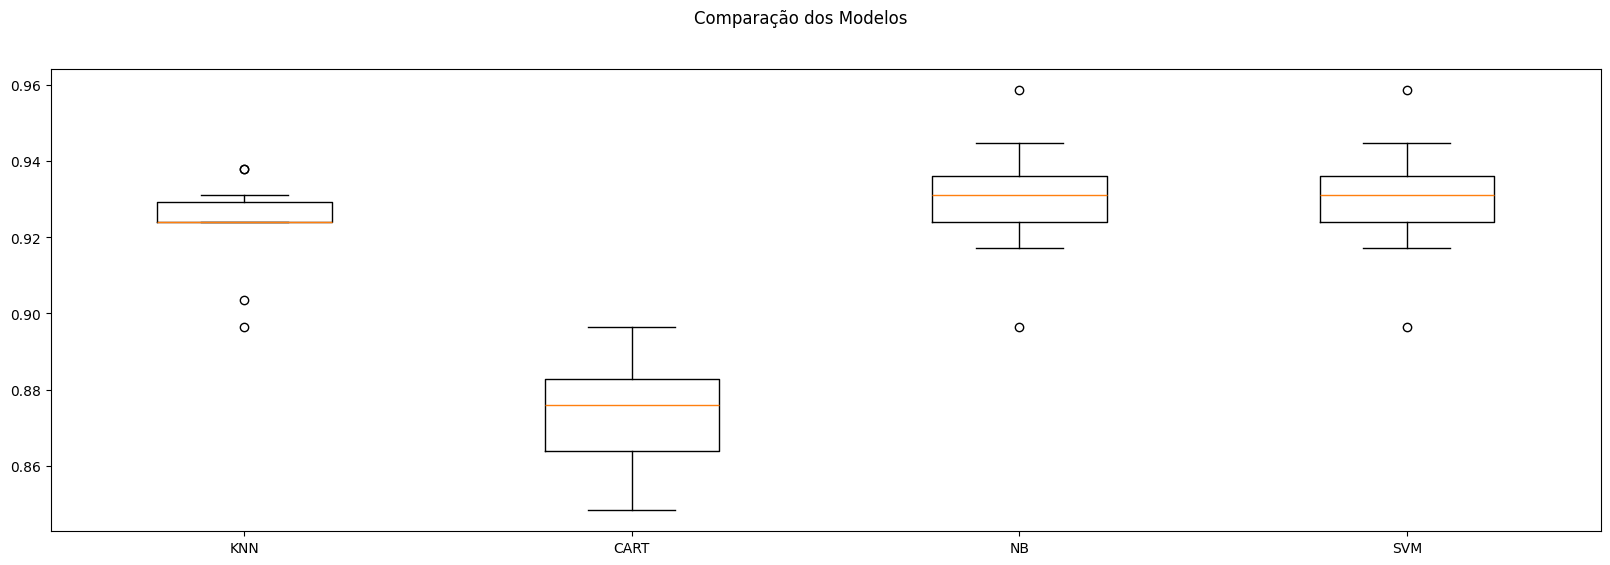

In [130]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: 0.923 (0.013)
CART-orig: 0.874 (0.015)
NB-orig: 0.930 (0.016)
SVM-orig: 0.930 (0.016)
KNN-padr: 0.922 (0.013)
CART-padr: 0.874 (0.014)
NB-padr: 0.930 (0.016)
SVM-padr: 0.930 (0.016)
KNN-norm: 0.921 (0.015)
CART-norm: 0.875 (0.015)
NB-norm: 0.930 (0.016)
SVM-norm: 0.930 (0.016)


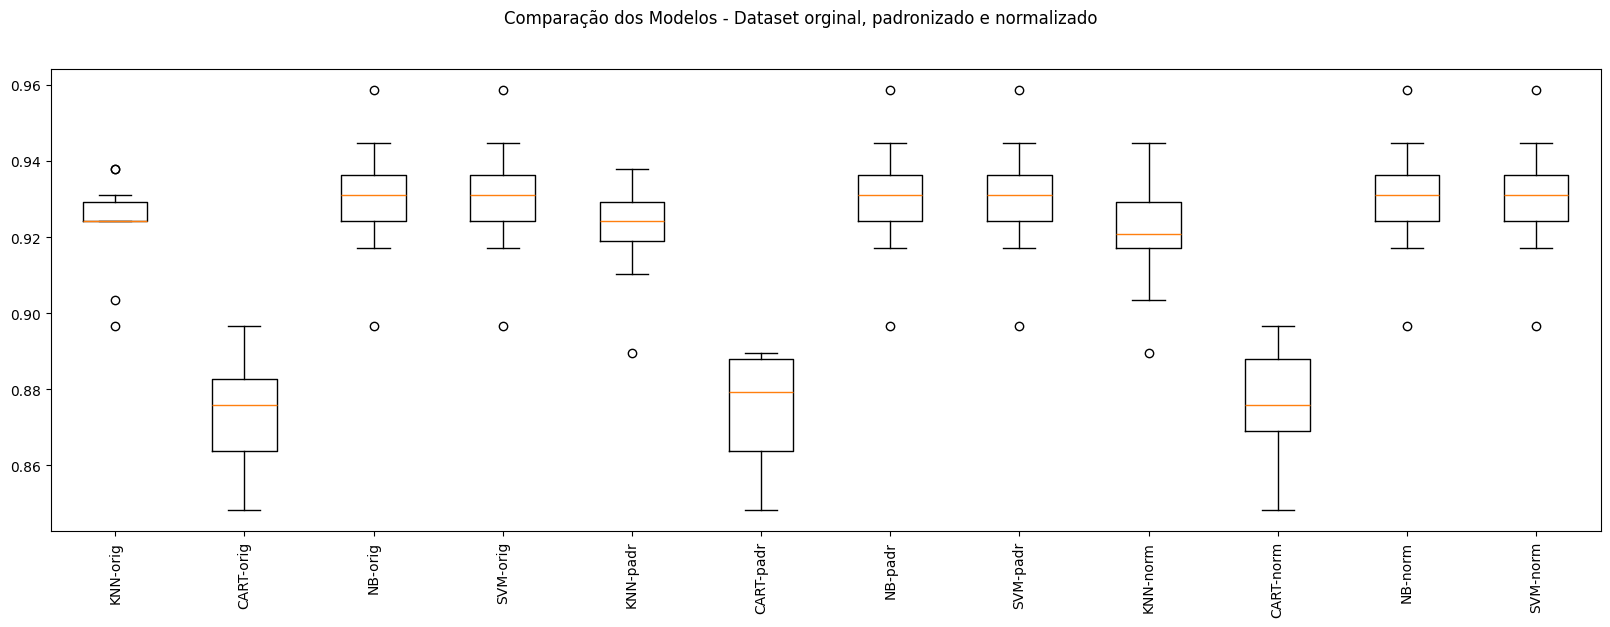

In [131]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [132]:
# Tuning do Naive Bayes

# Testa 10 valores diferentes de var_smoothing variando de 1e-11 até 1e-7.
param_grid = {
    'nb__var_smoothing': np.logspace(-11, -7, 10)
}

# Modelos e pipelines
nb = ('nb', GaussianNB())
std_scaler = ('scaler', StandardScaler())
minmax_scaler = ('scaler', MinMaxScaler())

# Pipelines para testar
pipelines = [
    ('nb-orig', Pipeline(steps=[nb])),
    ('nb-padr', Pipeline(steps=[std_scaler, nb])),
    ('nb-norm', Pipeline(steps=[minmax_scaler, nb]))
]

# Avaliação com GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(model, param_grid=param_grid, cv=kfold, scoring=scoring)
    grid.fit(X_train, y_train)
    print(f"{name}: Melhor score: {grid.best_score_:.4f} | Melhores parâmetros: {grid.best_params_}")

nb-orig: Melhor score: 0.9297 | Melhores parâmetros: {'nb__var_smoothing': np.float64(1e-11)}
nb-padr: Melhor score: 0.9297 | Melhores parâmetros: {'nb__var_smoothing': np.float64(1e-11)}
nb-norm: Melhor score: 0.9297 | Melhores parâmetros: {'nb__var_smoothing': np.float64(1e-11)}


## Finalização do Modelo

In [133]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train)   # padronização do treino
model = GaussianNB(var_smoothing=1e-11) # use o melhor parâmetro encontrado no GridSearchCV
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # padronização do teste
predictions = model.predict(rescaledTestX)
print('acurácia:', accuracy_score(y_test, predictions))

acurácia: 0.9386206896551724


In [134]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

GaussianNB(var_smoothing=1e-11)

In [135]:
# Treinamento
model = GaussianNB()
model.fit(X_train, y_train)

# Calcula a importância com base na diferença das médias entre as classes
importancias = np.abs(model.theta_[0] - model.theta_[1])

df_importancias = pd.DataFrame({
    'feature': X.columns,
    'importance': importancias
}).sort_values('importance', ascending=False)

print(df_importancias)

                     feature  importance
2              Going_outside    1.442871
1    Social_event_attendance    1.427946
0           Time_spent_Alone    1.408210
4             Post_frequency    1.386995
3        Friends_circle_size    1.325653
5                 Stage_fear    0.837345
6  Drained_after_socializing    0.833083


In [136]:
# Novos dados - não sabemos a classe!
data = {
    'Time_spent_Alone': [11, 6, 8,9],
    'Stage_fear': [1, 0, 1,1],
    'Social_event_attendance': [3, 5, 7,1],
    'Going_outside': [1, 3, 2,3],
    'Drained_after_socializing': [0, 1, 1,1],
    'Friends_circle_size': [2, 7, 3,3],
    'Post_frequency': [1, 2, 4,2]
}

atributos = [
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]

entrada = pd.DataFrame(data)[X.columns]

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(entrada)
saidas = model.predict(rescaledEntradaX)

print('Predições (0=Introvert, 1=Extrovert):', saidas)

Predições (0=Introvert, 1=Extrovert): [0 1 1 0]


In [137]:
# Cria as pastas, se não existirem
os.makedirs("../models", exist_ok=True)
os.makedirs("../scalers", exist_ok=True)
os.makedirs("../pipelines", exist_ok=True)
os.makedirs("../data", exist_ok=True)

# Salva o modelo
with open("../models/nb_personality_classifier.pkl", 'wb') as file:
    pickle.dump(model, file)

# Salva o scaler
with open("../scalers/standard_scaler_personality.pkl", 'wb') as file:
    pickle.dump(scaler, file)

# Salva os dados de teste
pd.DataFrame(X_test, columns=X.columns).to_csv("../data/X_test_personality.csv", index=False)
pd.DataFrame(y_test, columns=["Personality"]).to_csv("../data/y_test_personality.csv", index=False)

print("Modelo, scaler e dados de teste salvos com sucesso!")

Modelo, scaler e dados de teste salvos com sucesso!


## Análise dos resultados

Temos um dataset relativamente pequeno, com 2900 entradas, porém tivemos alta acurácia com todos os modelos utilizados.
A verificação de acurácia e o boxplot do modelo escolhido (Naive Bayes) está bem consistente.<br>
Ambos os modelos SVM e NB tiveram resultados semelhante, se não idênticos, utilizamos uma amostra de teste grande em relação ao conjunto por conta do volume de dados ser pequeno.
Porém, ao introduzir novos dados, não sei se gostei exatamente dos resultados da classificação, e creio que talvez para esse modelo seja mais interessante obter uma previsão probabilística (em porcentagem) ao invés de uma resposta binária (0 ou 1). Como uma das possíveis utilizações do sistema seriam para encontrar crianças com inclinação a hábitos de introversão, rotular como introversão ou não pode fugir da aplicação inicialmente pretendida, e limitar o uso desse estudo. Quando usamos IA para entender características humanas, precisamos entender que somos muito complexos para nos encaixar em certas casas de verdadeiro e falso. <br>
A maior dificuldade do projeto foi a falta de conhecimento prévio na parte de tratamento de dados. Muito foi aprendido ao longo do desenvolvimento, e mesmo que o resultado não seja o esperado, é um registro de algo aprendido.<br>
Além dos aspectos técnicos e éticos discutidos, também é importante considerar as boas práticas de segurança no tratamento de dados, especialmente quando se trata de informações sensíveis ou que podem envolver comportamento humano e traços de personalidade. Mesmo que não tenhamos dados de identificação, é fundamental aplicar técnicas de anonimização, como remoção de identificadores, generalização de faixas etárias para evitar reidentificação indireta. E também proteger os usuários caso ocorra algum incidente como vazamento de dados.